In [2]:
import pybaseball as pyb
from time import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
a = time()
df_2023 = pyb.statcast(start_dt='2023-03-30', end_dt='2023-09-29')
df_2024 = pyb.statcast(start_dt='2024-03-30', end_dt='2024-09-29')
df_2025 = pyb.statcast(start_dt='2025-03-30', end_dt='2025-09-29')
print(time() - a)

This is a large query, it may take a moment to complete


c:\Users\Mbubs\miniconda3\envs\sports\Lib\site-packages\pybaseball\statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|          | 0/184 [00:00<?, ?it/s]c:\Users\Mbubs\miniconda3\envs\sports\Lib\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly inste

This is a large query, it may take a moment to complete


c:\Users\Mbubs\miniconda3\envs\sports\Lib\site-packages\pybaseball\statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|          | 0/184 [00:00<?, ?it/s]c:\Users\Mbubs\miniconda3\envs\sports\Lib\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly inste

This is a large query, it may take a moment to complete


c:\Users\Mbubs\miniconda3\envs\sports\Lib\site-packages\pybaseball\statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|          | 0/184 [00:00<?, ?it/s]c:\Users\Mbubs\miniconda3\envs\sports\Lib\site-packages\pybaseball\datahelpers\postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly inste

309.6285834312439


In [5]:
df_2023 = df_2023.iloc[::-1]
df_2024 = df_2024.iloc[::-1]
df_2025 = df_2025.iloc[::-1]

In [6]:
df = df_2025

In [7]:
first_pitch_per_pitcher = df.groupby(['game_pk', 'pitcher']).head(1)

# Step 2: Starters are those whose first pitch came in inning 1 (top or bottom)
# Warning, this line really takes anyone whose first pitch was in 1st inning and calls them a starter
# So if a starter has a meltdown and a reliever comes in in the 1st, this is still labeling the reliever a starter
starters = first_pitch_per_pitcher[first_pitch_per_pitcher['inning'] == 1]

# Step 3: Create starter ID pairs (game_pk, pitcher)
starter_ids = starters[['game_pk', 'pitcher']].drop_duplicates()

# Step 4: Label each row in the full DataFrame as 'starter' or 'reliever'
df = df.copy()  # avoid SettingWithCopyWarning

is_starter = pd.MultiIndex.from_frame(df[['game_pk','pitcher']]).isin(
    pd.MultiIndex.from_frame(starter_ids)
)
df['role'] = np.where(is_starter, 'starter', 'reliever')


In [30]:
starters = df[df['role'] == 'starter'].copy()

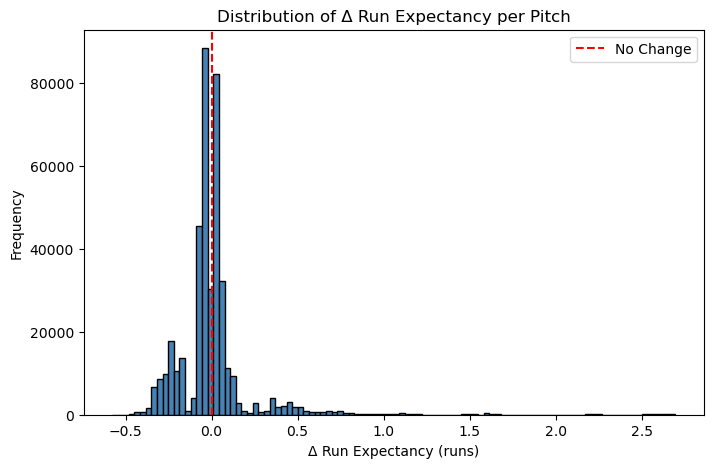

In [21]:
plt.figure(figsize=(8,5))
plt.hist(starters['delta_run_exp'], bins=100, color='steelblue', edgecolor='k')
plt.axvline(0, color='red', linestyle='--', label='No Change')
plt.title('Distribution of Δ Run Expectancy per Pitch')
plt.xlabel('Δ Run Expectancy (runs)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [31]:
pitcher = 608379
game_num = 778510

In [ ]:
W_future = 20    # target next 20 pitches
min_future = 10

g = starters.groupby(['pitcher','game_pk'], group_keys=False)


starters['dre_future_inclusive'] = g['delta_run_exp'].transform(
    lambda s: s.shift(-(W_future-1)).rolling(W_future, min_periods=min_future).mean()
)

In [ ]:
# evaulate the correctness of the code with the game and pitcher example
# look into a basemodel to fit the data and visualize the rolling average window in the game 
# how does velo vs window look like etc 
